In [3]:
import requests
import pandas as pd


In [4]:
csv_reader="global-data-on-sustainable-energy (1).csv"
global_data=pd.read_csv(csv_reader)
global_df=pd.DataFrame(global_data)
global_df.dropna()
global_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


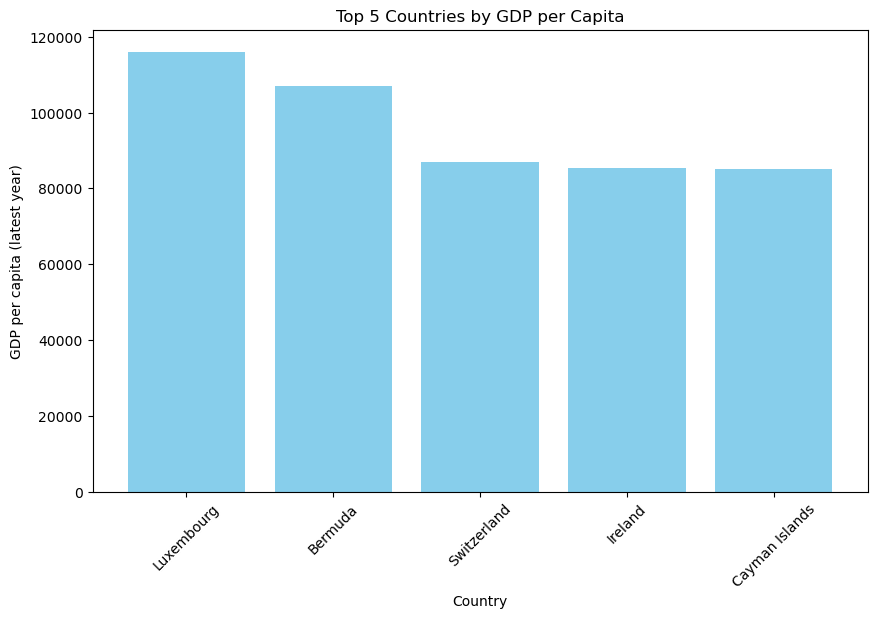

,Entity,Year,gdp_per_capita
1974,Luxembourg,2020,116014.60250
419,Bermuda,2020,107079.47980
3228,Switzerland,2020,87097.03645
1617,Ireland,2020,85267.76474
650,Cayman Islands,2020,85082.52686


In [36]:
# ------->   4
# Drop rows where 'gdp_per_capita' is NaN to ensure we work with complete data for that column
filtered_data = data.dropna(subset=['gdp_per_capita'])

# Find the latest year of data for each country
latest_data = filtered_data.loc[filtered_data.groupby('Entity')['Year'].idxmax()]

# Sort the countries based on 'gdp_per_capita' and get the top 5
top5_gdp_per_capita = latest_data.sort_values(by='gdp_per_capita', ascending=False).head(5)

# Create a histogram for the GDP per capita of these top 5 countries
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top5_gdp_per_capita['Entity'], top5_gdp_per_capita['gdp_per_capita'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('GDP per capita (latest year)')
plt.title('Top 5 Countries by GDP per Capita')
plt.xticks(rotation=45)
plt.show()

# Show the table of the top 5 countries and their GDP per capita values
top5_gdp_per_capita[['Entity', 'Year', 'gdp_per_capita']]


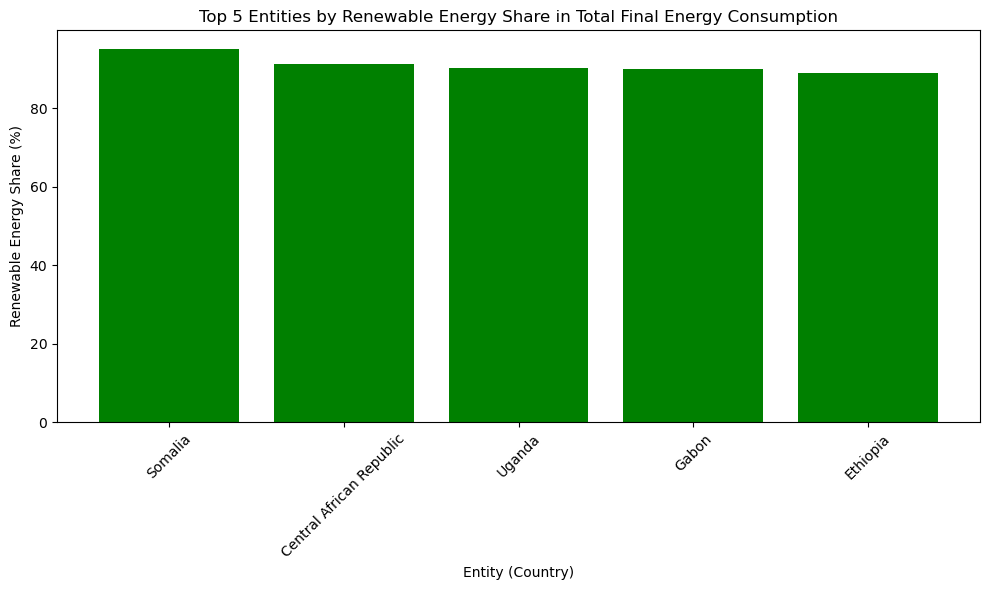

,Entity,Year,Renewable energy share in the total final energy consumption (%)
3072,Somalia,2019,95.03
670,Central African Republic,2019,91.26
3437,Uganda,2019,90.22
1238,Gabon,2019,89.88
1153,Ethiopia,2019,88.92


In [35]:
# -------> 4.0

import matplotlib.pyplot as plt

# Extracting the needed columns and dropping NA values for relevant analysis
filtered_data = data[['Entity', 'Year', 'Renewable energy share in the total final energy consumption (%)']].dropna()

# Finding the latest year of data for each country
latest_data = filtered_data.loc[filtered_data.groupby('Entity')['Year'].idxmax()]

# Sorting the entities based on the renewable energy share and getting the top 5
top_5_entities = latest_data.sort_values(by='Renewable energy share in the total final energy consumption (%)', ascending=False).head(5)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_5_entities['Entity'], top_5_entities['Renewable energy share in the total final energy consumption (%)'], color='green')
plt.xlabel('Entity (Country)')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Top 5 Entities by Renewable Energy Share in Total Final Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_5_entities


In [39]:
# -------> 4.1
# Filter the data to include only the most recent year for each region
# and select only the relevant columns for the histogram

# Drop rows where the capacity data is missing
filtered_data = data.dropna(subset=['Renewable-electricity-generating-capacity-per-capita'])

# Get the most recent year of data for each 'Entity'
filtered_data = filtered_data.loc[filtered_data.groupby('Entity')['Year'].idxmax()]

# Selecting relevant columns for visualization
histogram_data = filtered_data[['Entity', 'Renewable-electricity-generating-capacity-per-capita']]

# Display the processed data to be used for the histogram
histogram_data.head(), histogram_data.describe()


(                  Entity  Renewable-electricity-generating-capacity-per-capita
 20           Afghanistan                                               9.35   
 62               Algeria                                              15.64   
 83                Angola                                             115.43   
 104  Antigua and Barbuda                                             167.98   
 125            Argentina                                             311.28   ,
        Renewable-electricity-generating-capacity-per-capita
 count                                         131.000000   
 mean                                          173.861908   
 std                                           336.193748   
 min                                             0.060000   
 25%                                            15.300000   
 50%                                            67.600000   
 75%                                           186.910000   
 max                           

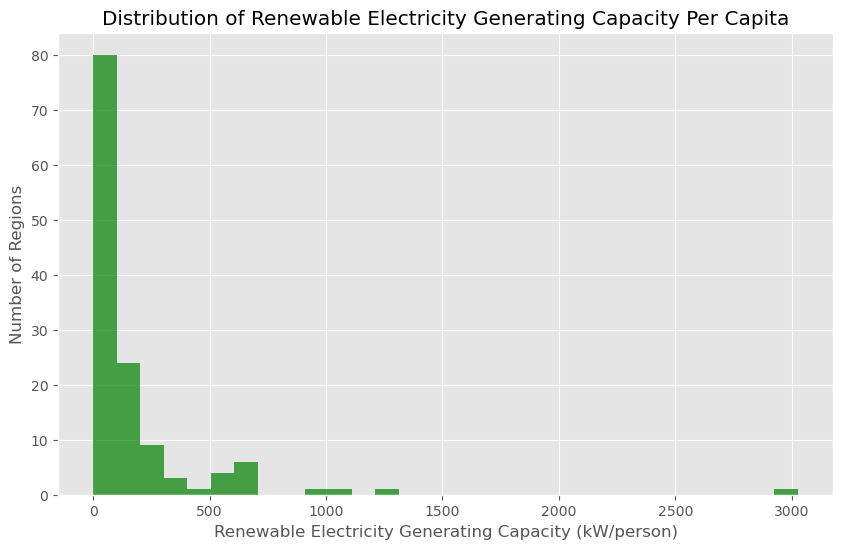

In [40]:
# -------> 4.2
import matplotlib.pyplot as plt

# Setting the style
plt.style.use('ggplot')

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(histogram_data['Renewable-electricity-generating-capacity-per-capita'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Renewable Electricity Generating Capacity Per Capita')
plt.xlabel('Renewable Electricity Generating Capacity (kW/person)')
plt.ylabel('Number of Regions')
plt.grid(True)
plt.show()

# Histograma para visualizar la distribución de la capacidad de generación de electricidad renovable por persona en diferentes regiones.
# Esto nos ayudará a identificar qué regiones podrían ser focos clave para inversiones en energías verdes.

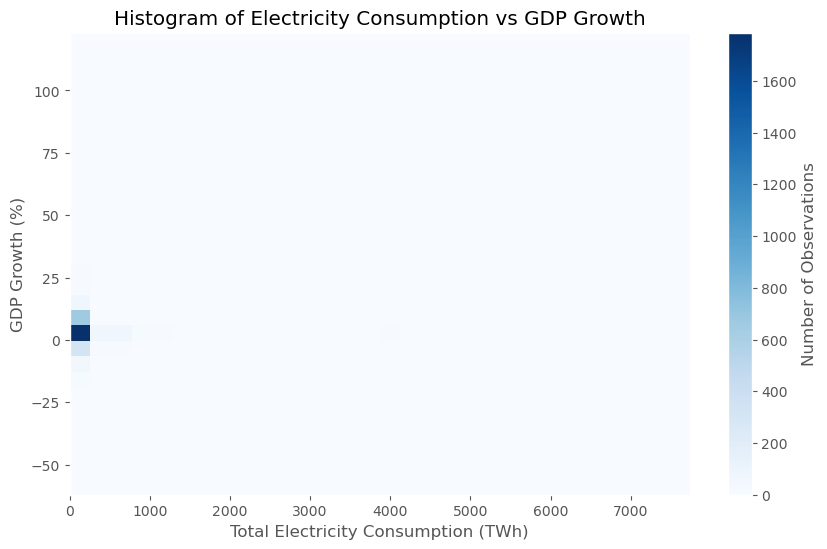

In [41]:
# -------> 4.3
import matplotlib.pyplot as plt

# Calculate the total electricity consumption by summing up the TWh from all sources
data['Total Electricity (TWh)'] = data['Electricity from fossil fuels (TWh)'] + data['Electricity from nuclear (TWh)'] + data['Electricity from renewables (TWh)']

# Drop rows where any of the relevant data is missing
data_clean = data.dropna(subset=['Total Electricity (TWh)', 'gdp_growth'])

# Create a histogram to visualize the relationship between Total Electricity Consumption and GDP Growth
plt.figure(figsize=(10, 6))
plt.hist2d(data_clean['Total Electricity (TWh)'], data_clean['gdp_growth'], bins=30, cmap='Blues')
plt.colorbar(label='Number of Observations')
plt.xlabel('Total Electricity Consumption (TWh)')
plt.ylabel('GDP Growth (%)')
plt.title('Histogram of Electricity Consumption vs GDP Growth')
plt.grid(True)
plt.show()

#histograma que muestra la relación entre el consumo total de electricidad (en teravatios-hora) y el crecimiento del PIB (en porcentaje).
#Este gráfico es un histograma bidimensional donde el color más oscuro indica una mayor cantidad de observaciones en ese rango específico.
#El eje X representa el consumo total de electricidad.
#El eje Y muestra el crecimiento del PIB.
#La barra de colores a la derecha indica el número de observaciones en cada combinación de consumo de electricidad y crecimiento del PIB.
#Si necesitas algún ajuste específico en el gráfico o más análisis sobre los datos, házmelo saber. ​​









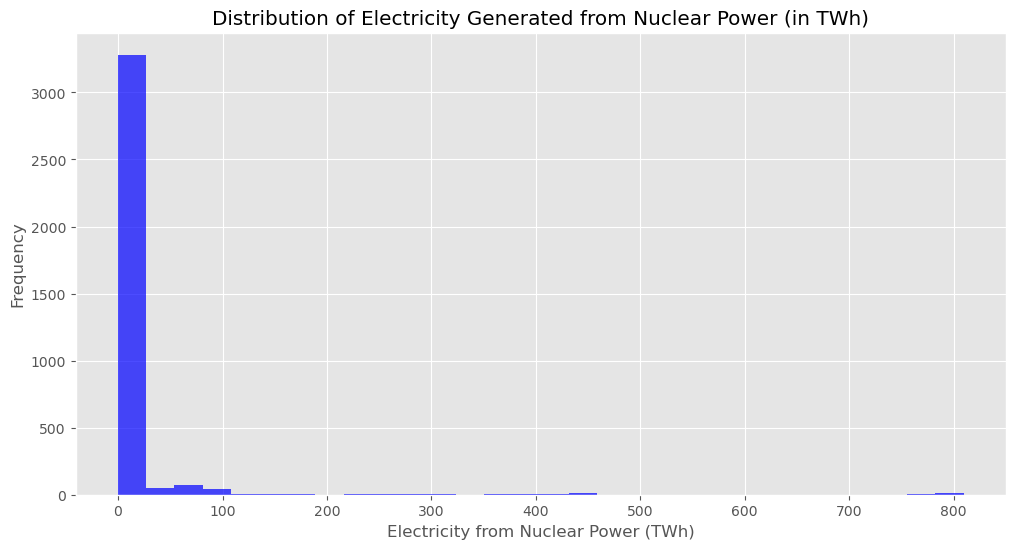

In [42]:
# -------> 4.4
import matplotlib.pyplot as plt

# Filter the relevant columns for the histogram: 'Entity', 'Year', and 'Electricity from nuclear (TWh)'
nuclear_power_data = data[['Entity', 'Year', 'Electricity from nuclear (TWh)']]

# Drop any rows where nuclear electricity generation data might be missing
nuclear_power_data = nuclear_power_data.dropna(subset=['Electricity from nuclear (TWh)'])

# Plotting the histogram for the distribution of electricity generated from nuclear power across all countries and years in the dataset
plt.figure(figsize=(12, 6))
plt.hist(nuclear_power_data['Electricity from nuclear (TWh)'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Electricity Generated from Nuclear Power (in TWh)')
plt.xlabel('Electricity from Nuclear Power (TWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


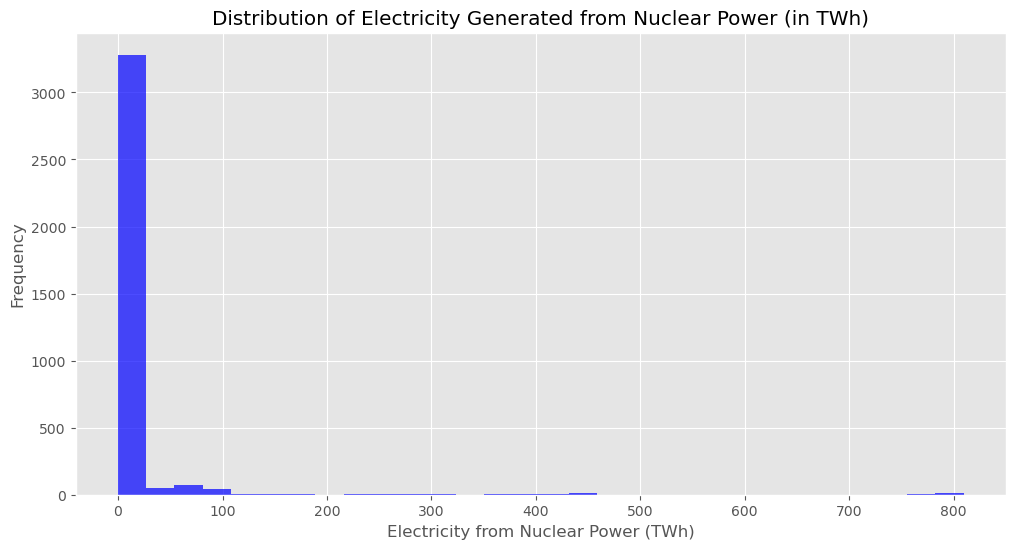

In [43]:
# -------> 4.5 
import matplotlib.pyplot as plt

# Filter the relevant columns for the histogram: 'Entity', 'Year', and 'Electricity from nuclear (TWh)'
nuclear_power_data = data[['Entity', 'Year', 'Electricity from nuclear (TWh)']]

# Drop any rows where nuclear electricity generation data might be missing
nuclear_power_data = nuclear_power_data.dropna(subset=['Electricity from nuclear (TWh)'])

# Plotting the histogram for the distribution of electricity generated from nuclear power across all countries and years in the dataset
plt.figure(figsize=(12, 6))
plt.hist(nuclear_power_data['Electricity from nuclear (TWh)'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Electricity Generated from Nuclear Power (in TWh)')
plt.xlabel('Electricity from Nuclear Power (TWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
